<a href="https://colab.research.google.com/github/SANDHIYA5505/Disease-detection/blob/main/Disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip install opendatasets

In [3]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sandhiya5505","key":"2e40beeaf342d5081ee449779cc2927a"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!pip install kaggle


In [6]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten


Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0
100% 4.76G/4.77G [01:28<00:00, 34.7MB/s]
100% 4.77G/4.77G [01:28<00:00, 57.6MB/s]


In [7]:
!unzip -n fruit-and-vegetable-disease-healthy-vs-rotten.zip -d /content/fruit_veg_dataset/



Streaming output truncated to the last 5000 lines.
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (85).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (86).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (87).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (88).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (89).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (9).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (90).jpg  
  inflating: /content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (91).jpg  
  inflating: /content/

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = "/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset"


# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Load the images
data_flow = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'      # Assuming binary classification (healthy vs rotten)
)


Found 29277 images belonging to 28 classes.


In [9]:
import os

dataset_path = '/content/fruit_veg_dataset/'

for root, dirs, files in os.walk(dataset_path):
    print(root, "->", len(files), "files")


/content/fruit_veg_dataset/ -> 0 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset -> 0 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Tomato__Healthy -> 604 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Apple__Healthy -> 2438 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Guava__Rotten -> 200 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy -> 615 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Pomegranate__Rotten -> 200 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Grape__Healthy -> 200 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Carrot__Rotten -> 580 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Strawberry__Healthy -> 1603 files
/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset/Orange__Healthy -> 2075 files
/content/fruit_veg_dataset/Fruit And Vegeta

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


Data Augmentation(preprocessing + validation)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the correct path to the dataset
dataset_path = "/content/fruit_veg_dataset/Fruit And Vegetable Diseases Dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode="nearest"
)

train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),   # smaller images
    batch_size=64,            # larger batch
    class_mode="categorical", # Changed from 'binary' to 'categorical'
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),   # smaller images
     batch_size=64,            # larger batch
    class_mode="categorical", # Changed from 'binary' to 'categorical'
    subset="validation"
)

Found 23431 images belonging to 28 classes.
Found 5846 images belonging to 28 classes.


In [12]:
num_classes = train_gen.num_classes
print("Number of classes:", num_classes)
print("Class indices:", train_gen.class_indices)

Number of classes: 28
Class indices: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}


Regularization in Model ( CNN definition)

In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128,128,3)),

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),   # prevent overfitting
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         7,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,523,228 (24.88 MB)

 Trainable params: 6,523,228 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

Early Stopping (add to your model.fit)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,    # try smaller
    callbacks=callbacks,
    verbose=1
)





/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 43/367 ━━━━━━━━━━━━━━━━━━━━ 3:52 718ms/step - accuracy: 0.1032 - loss: 3.0871

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.2203 - loss: 2.6139

367/367 ━━━━━━━━━━━━━━━━━━━━ 356s 950ms/step - accuracy: 0.2205 - loss: 2.6130 - val_accuracy: 0.4418 - val_loss: 1.8053
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.4436 - loss: 1.7949

367/367 ━━━━━━━━━━━━━━━━━━━━ 321s 876ms/step - accuracy: 0.4437 - loss: 1.7947 - val_accuracy: 0.5527 - val_loss: 1.4584
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.5274 - loss: 1.5149

367/367 ━━━━━━━━━━━━━━━━━━━━ 311s 846ms/step - accuracy: 0.5274 - loss: 1.5147 - val_accuracy: 0.6081 - val_loss: 1.2689
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.5850 - loss: 1.3309

367/367 ━━━━━━━━━━━━━━━━━━━━ 315s 859ms/step - accuracy: 0.5850 - loss: 1.3308 - val_accuracy: 0.6572 - val_loss: 1.1274
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.6266 - loss: 1.2119

367/367 ━━━━━━━━━━━━━━━━━━━━ 313s 854ms/step - accuracy: 0.6266 - loss: 1.2118 - val_accuracy: 0.6960 - val_loss: 1.0134
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.6625 - loss: 1.0946

367/367 ━━━━━━━━━━━━━━━━━━━━ 312s 852ms/step - accuracy: 0.6625 - loss: 1.0945 - val_accuracy: 0.7025 - val_loss: 1.0394
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.6860 - loss: 1.0190

367/367 ━━━━━━━━━━━━━━━━━━━━ 311s 847ms/step - accuracy: 0.6860 - loss: 1.0189 - val_accuracy: 0.7299 - val_loss: 0.9515
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.6980 - loss: 0.9693

367/367 ━━━━━━━━━━━━━━━━━━━━ 315s 860ms/step - accuracy: 0.6980 - loss: 0.9693 - val_accuracy: 0.7480 - val_loss: 0.8693
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 311s 849ms/step - accuracy: 0.7208 - loss: 0.8936 - val_accuracy: 0.7475 - val_loss: 0.8382
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.7189 - loss: 0.9022

367/367 ━━━━━━━━━━━━━━━━━━━━ 316s 860ms/step - accuracy: 0.7189 - loss: 0.9022 - val_accuracy: 0.7629 - val_loss: 0.8150


Transfer Learning


---



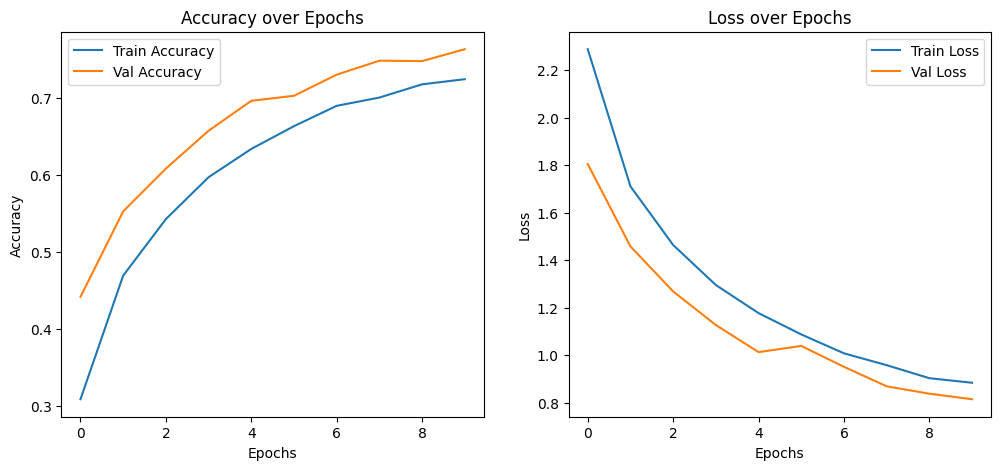

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1️⃣ Plot Training Curves (Histograms of Accuracy & Loss)
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Prediction


17/92 ━━━━━━━━━━━━━━━━━━━━ 54s 733ms/step

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 71s 762ms/step


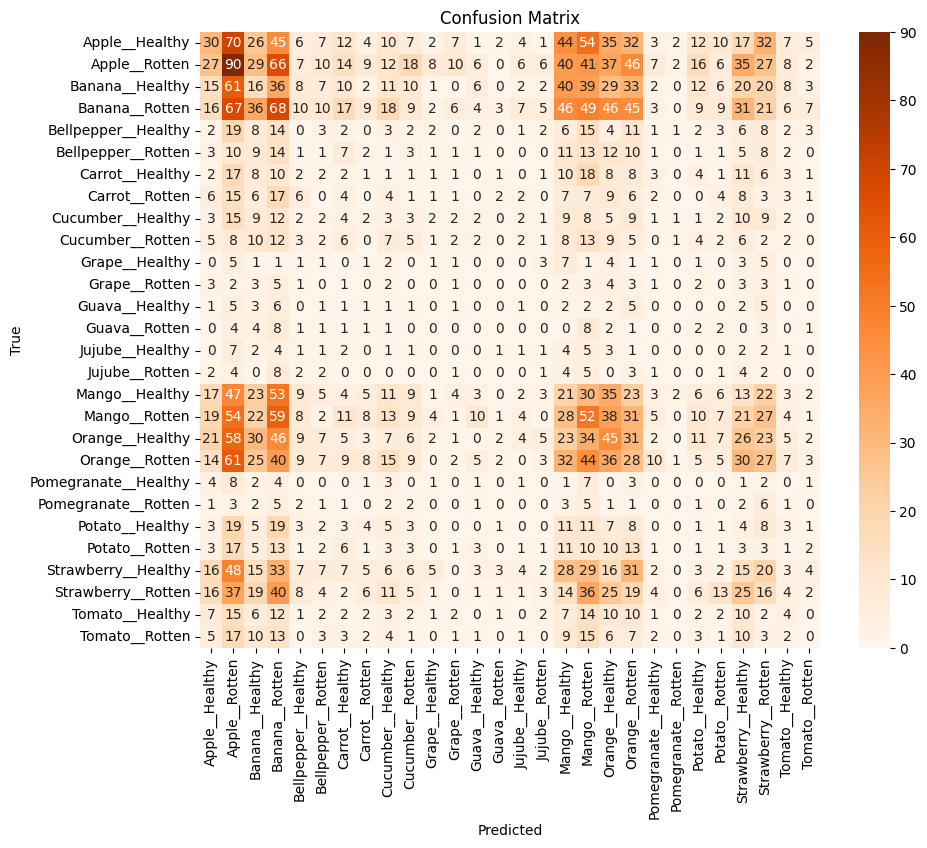

In [16]:
# 2️⃣ Confusion Matrix
# Get predictions on validation data
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
# 3️⃣ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=val_gen.class_indices.keys()))


Classification Report:

                      precision    recall  f1-score   support

      Apple__Healthy       0.12      0.06      0.08       487
       Apple__Rotten       0.11      0.15      0.13       585
     Banana__Healthy       0.05      0.04      0.04       399
      Banana__Rotten       0.10      0.12      0.11       559
 Bellpepper__Healthy       0.00      0.00      0.00       122
  Bellpepper__Rotten       0.01      0.01      0.01       118
     Carrot__Healthy       0.01      0.02      0.02       123
      Carrot__Rotten       0.00      0.00      0.00       115
   Cucumber__Healthy       0.02      0.02      0.02       121
    Cucumber__Rotten       0.04      0.04      0.04       118
      Grape__Healthy       0.03      0.03      0.03        40
       Grape__Rotten       0.02      0.03      0.02        40
      Guava__Healthy       0.00      0.00      0.00        40
       Guava__Rotten       0.00      0.00      0.00        40
     Jujube__Healthy       0.02      0.03   

Saving Banana1.jpg to Banana1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


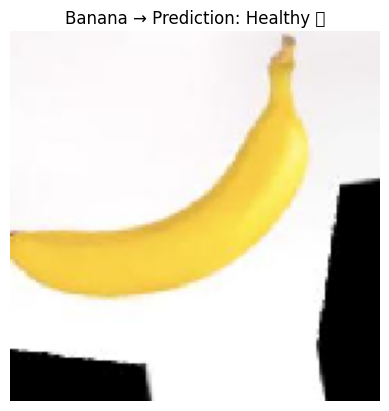

🧠 Banana classified as: Healthy ✅


In [22]:
# 📦 Step 1: Upload image
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 📚 Step 2: Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 🧠 Step 3: Helper functions
def get_fruit_type(img_path):
    filename = os.path.basename(img_path).lower()
    if "banana" in filename:
        return "Banana"
    elif "apple" in filename:
        return "Apple"
    elif "orange" in filename:
        return "Orange"
    elif "tomato" in filename:
        return "Tomato"
    elif "potato" in filename:
        return "Potato"
    else:
        return None

def get_relevant_classes(fruit_type, class_indices):
    return [cls for cls in class_indices if fruit_type.lower() in cls.lower()]

# 🔍 Step 4: Prediction function
def predict_uploaded_image(img_path, model, class_indices):
    fruit_type = get_fruit_type(img_path)
    if not fruit_type:
        print("❌ Could not detect fruit type from filename.")
        return

    relevant_classes = get_relevant_classes(fruit_type, class_indices)
    if not relevant_classes:
        print(f"❌ No matching classes found for fruit type: {fruit_type}")
        return

    relevant_indices = [class_indices[cls] for cls in relevant_classes]

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)[0]
    filtered_preds = [pred[i] for i in relevant_indices]
    best_idx = relevant_indices[np.argmax(filtered_preds)]
    class_label = list(class_indices.keys())[best_idx]

    # Binary classification
    label = "Healthy ✅" if "healthy" in class_label.lower() else "Diseased ❌"

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{fruit_type} → Prediction: {label}")
    plt.show()

    print(f"🧠 {fruit_type} classified as: {label}")

# ✅ Step 5: Run prediction
# Make sure your model and val_gen are already loaded
# Example:
# from tensorflow.keras.models import load_model
# model = load_model("your_model.h5")
# val_gen = ImageDataGenerator(...).flow_from_directory(...)

predict_uploaded_image(img_path, model, val_gen.class_indices)


